In [3]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Resizing, Rescaling , RandomFlip , RandomRotation
from tensorflow.keras import Sequential
import numpy as np


In [4]:
#constant values
IMAGE_SIZE= 256
BATCH_SIZE= 32
CHANNELS = 3 
EPOCHS = 50

In [5]:
# loading of Data / Images
# Image preprocessing 
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE 
)

Found 3988 files belonging to 9 classes.


In [6]:
# Class Names or Labels Names
class_names = dataset.class_names
class_names

['Berry',
 'Fig',
 'Guava',
 'Orange',
 'Palm',
 'Persimmon',
 'Tomato',
 'apple',
 'grape']

In [7]:
#length of Dataset //  32*125 = 4000 / which approximately to our total number of images
len(dataset)

125

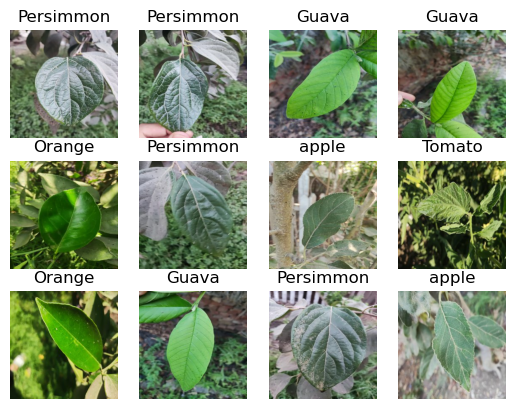

In [8]:
# randomly showing 12 images from the dataset 
for image_batch, label_batch in dataset.take(1):
   for i in range(12):
        ax= plt.subplot(3,4,i+1)# for printing in a matrics of 3*4
        plt.imshow(image_batch[i].numpy().astype("uint8"))# for printing image
        plt.title(class_names[label_batch[i]]) # for printing label name
        plt.axis("off")


In [9]:
#dividing the dataset for training , test and validation pourpose
#70% ==> training
#30% ==> 15% validation , 15% test

In [10]:
# for inatializing the lengthb of training data
train_size = 0.7
len(dataset)*train_size

87.5

In [11]:
test_ds = dataset.skip(100) 
len(test_ds)

25

In [12]:
# for inatializing the lengthb of validating data
val_size=0.15
len(dataset)*val_size

18.75

In [13]:
val_ds = test_ds.take(18)
len(val_ds)

18

In [14]:
test_ds = test_ds.skip(18)
len(test_ds)


7

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.7, val_split=0.15, shuffle= True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size= int(train_split*ds_size)
    val_size= int(val_split*ds_size)

    train_ds= ds.take(train_size)

    val_ds= ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

87

In [18]:
len(val_ds)

18

In [19]:
len(test_ds)

20

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:

resize_and_rescale = Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1.0 / 255)
])


In [22]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])

In [23]:
# Define the model again without calling model.build() or using dummy input
input_shape = (BATCH_SIZE , IMAGE_SIZE , IMAGE_SIZE, CHANNELS)
n_classes = 9

model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)
# Check model summary directly
model.summary()


c:\ProgramData\anaconda3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 9)                │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,137 (719.29 KB)

 Trainable params: 184,137 (719.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.2454 - loss: 1.8591 - val_accuracy: 0.5139 - val_loss: 1.2443
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 951ms/step - accuracy: 0.5108 - loss: 1.2102 - val_accuracy: 0.6302 - val_loss: 1.0101
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 83s 957ms/step - accuracy: 0.6093 - loss: 1.0084 - val_accuracy: 0.6840 - val_loss: 0.9076
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 79s 904ms/step - accuracy: 0.6594 - loss: 0.8801 - val_accuracy: 0.6823 - val_loss: 0.8616
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 78s 898ms/step - accuracy: 0.6938 - loss: 0.8237 - val_accuracy: 0.7812 - val_loss: 0.6336
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 84s 965ms/step - accuracy: 0.7431 - loss: 0.6853 - val_accuracy: 0.5972 - val_loss: 1.0321
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 77s 886ms/step - accuracy: 0.7317 - loss: 0.7207 - val_accuracy: 0.7257 - val_loss: 0.7589
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 86s 986ms/step - accuracy: 0.7632 - loss: 0.6494 - val_accurac

In [26]:
scores=model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.9824 - loss: 0.0529


In [27]:
scores

[0.045988019555807114, 0.989062488079071]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 87}

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

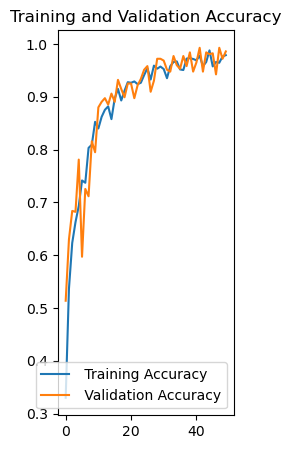

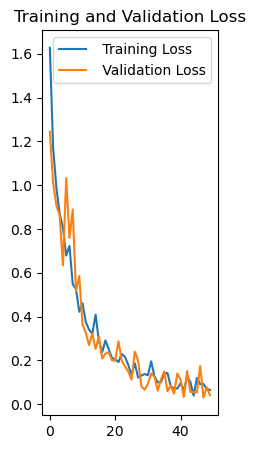

In [32]:

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label= ' Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label= ' Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy') 
plt.show()
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label= ' Training Loss')
plt.plot(range(EPOCHS),val_loss,label= ' Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss') 
plt.show()

First image to predict
first image's actual label: Orange
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
Predicted label: Orange


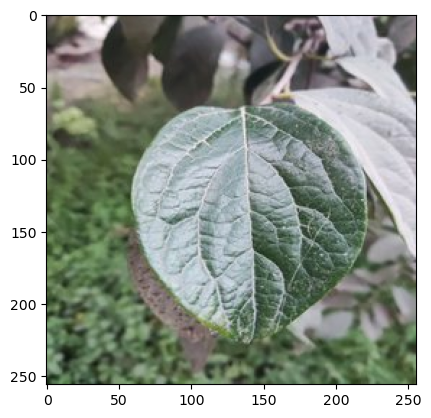

In [33]:
for images_batch, labels_batch in test_ds.take(1):
   
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [34]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class,confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


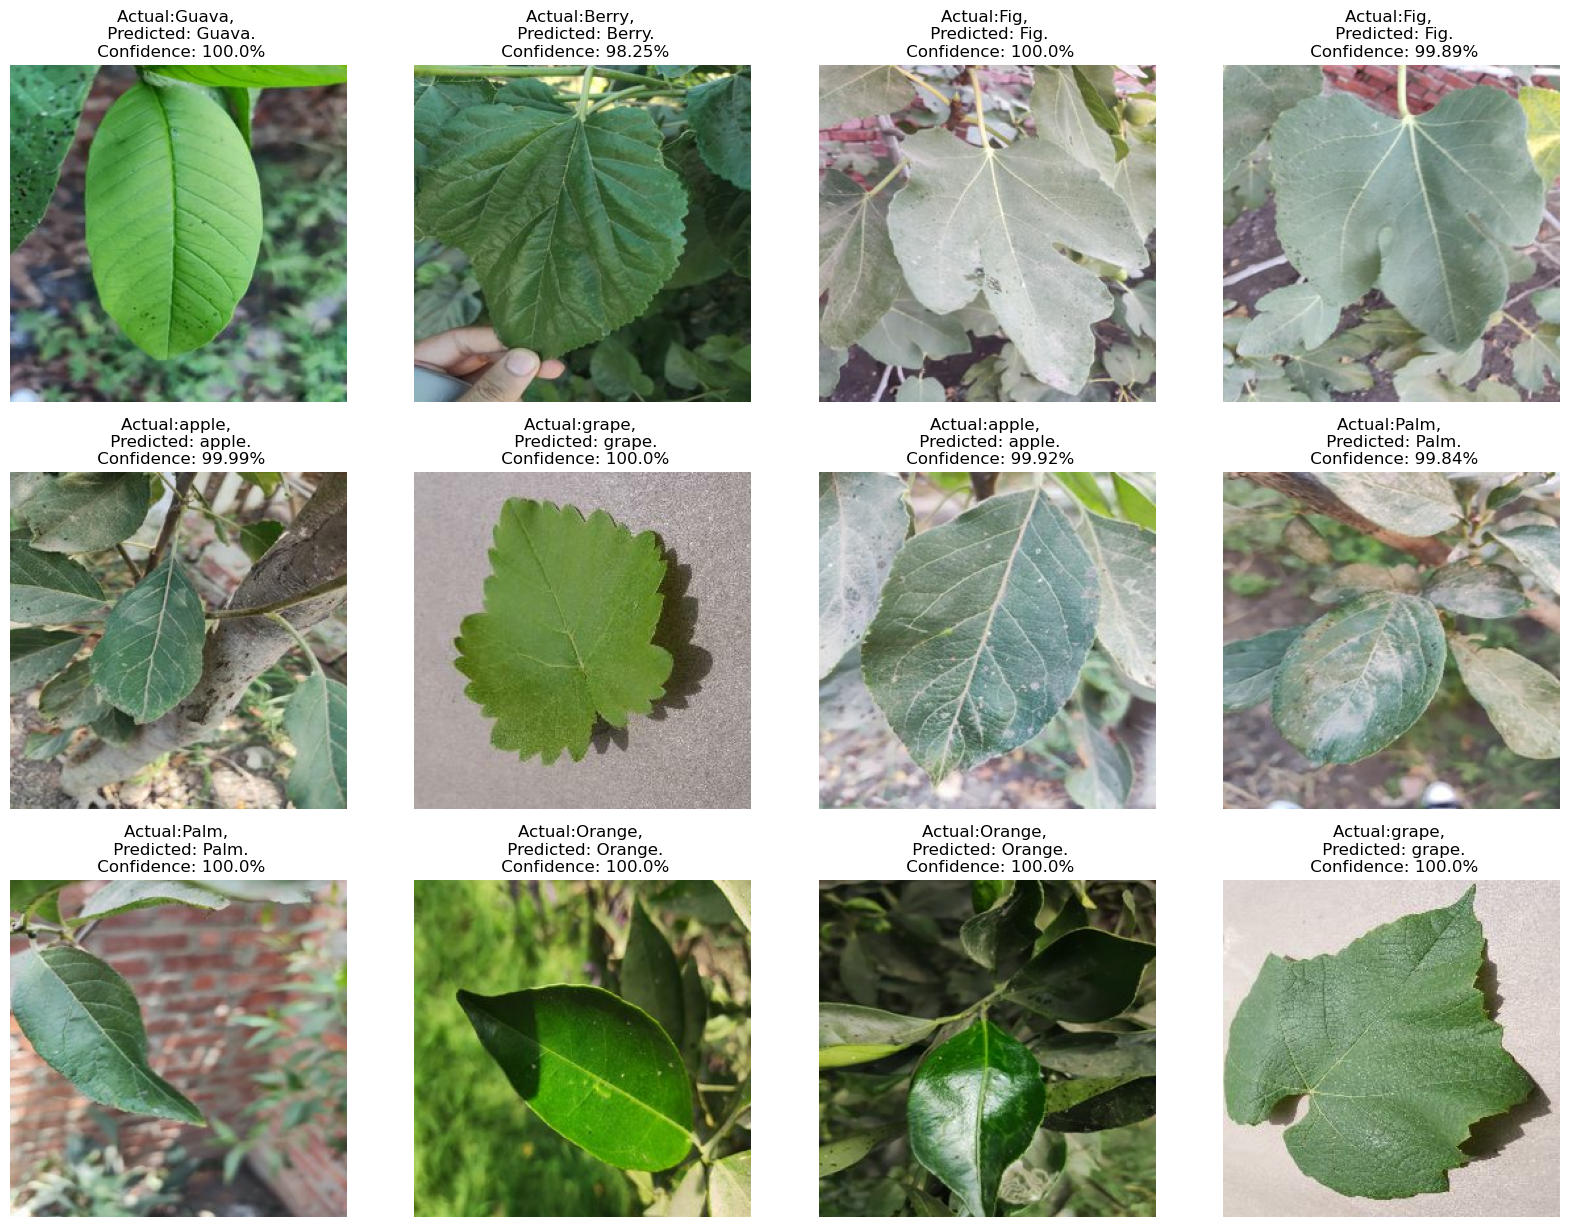

In [35]:
plt.figure(figsize=(20,15))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off") 

In [36]:
from tensorflow.keras.models import Sequential

model_version = 1
# Save the model in the .keras format (recommended)
model.save("../models/saved_model1.keras")

In [37]:
import numpy as np

y_true = []  # To store the true labels
y_pred = []  # To store the predicted labels

for images, labels in test_ds:
    # Check if labels are one-hot encoded (2D array) or class indices (1D array)
    if len(labels.shape) > 1:  # If labels are one-hot encoded
        y_true.extend(np.argmax(labels.numpy(), axis=1))
    else:  # If labels are already class indices
        y_true.extend(labels.numpy())
    
    # Predict with the model
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class index
    y_pred.extend(predicted_classes)

# Convert lists to numpy arrays (optional, for compatibility)
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Now you can use y_true and y_pred for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 889ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 963ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 682ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
Classification Report:
              precision    recall  f1-score   support

       Berry       0.96      1.00      0.98        54
         Fig       1.00      0.99      0.99        77
       Guava       0.99      1.00      0.99        78
    

In [40]:
test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9914 - loss: 0.0480
Test accuracy: 98.91%
